In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True)

In [3]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
data.shape

(42, 2)

In [5]:
A=[]
B=[]
for i in range(0,42,1):
    A.append(data.Quarter[i][:2])
    B.append(data.Quarter[i][3:])
A=pd.DataFrame(A,columns=["4months"])
B=pd.DataFrame(B,columns=["year"])

In [6]:
data=pd.concat([data,A,B],axis=1)

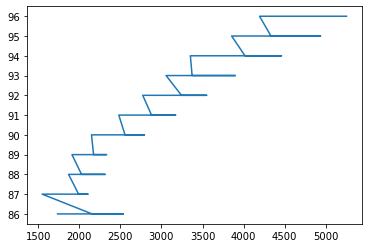

In [7]:
plt.plot(data["Sales"],data["year"])

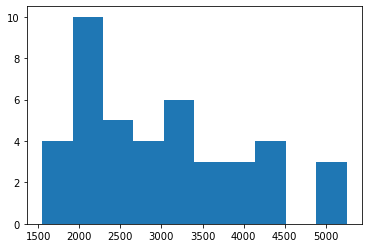

In [8]:
plt.hist(data.Sales,)
plt.show()

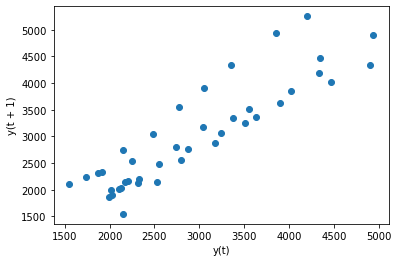

In [9]:
pd.plotting.lag_plot(data['Sales'])

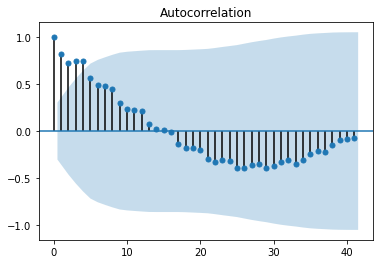

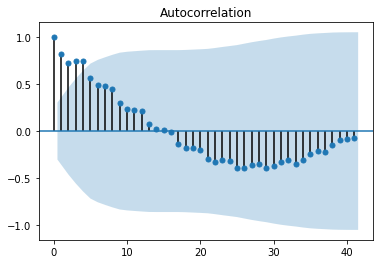

In [10]:
plot_acf(data['Sales'],lags=41)

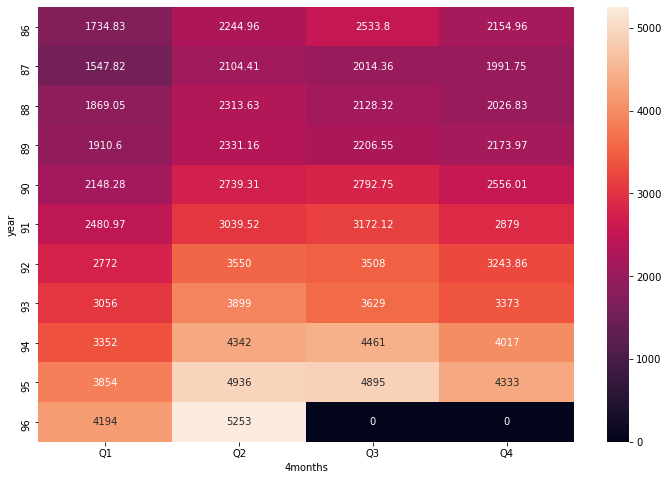

In [11]:
#Heat map
plt.figure(figsize=(12,8))
heatmap_Y_month=pd.pivot_table(data=data,values="Sales",index="year",columns="4months",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_Y_month,annot=True,fmt='g')

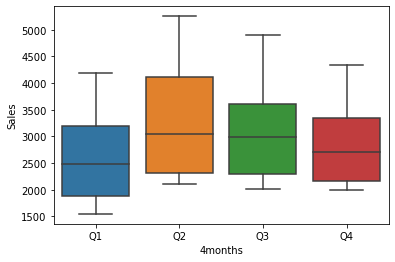

In [12]:
sns.boxplot(x="4months",y="Sales",data=data)
#seasonal component

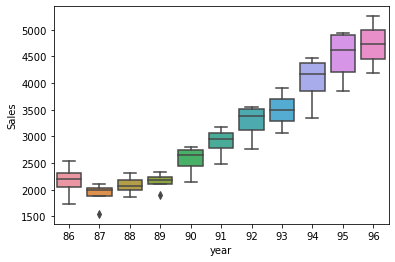

In [13]:
sns.boxplot(x='year',y='Sales',data=data)
#trend

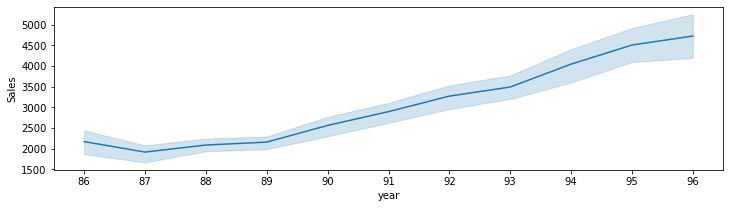

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=data)

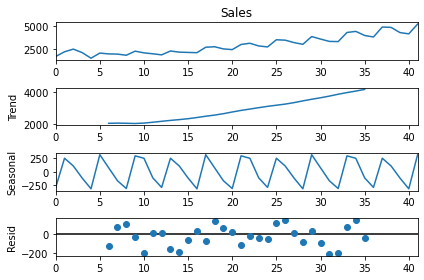

In [15]:
decompose_ts_add=seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [16]:
quater_dummies=pd.DataFrame(pd.get_dummies(data["4months"]))
data=pd.concat([data,quater_dummies],axis=1)
data["t"]=np.arange(1,43)
data["t_square"]=data["t"]*data["t"]
data["log_Sales"]=np.log(data["Sales"])

In [17]:
data

,Quarter,Sales,4months,year,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [18]:
Train=data.head(30)
Test=data.tail(12)

RMSE_Linear_Model: 714.0144483281297


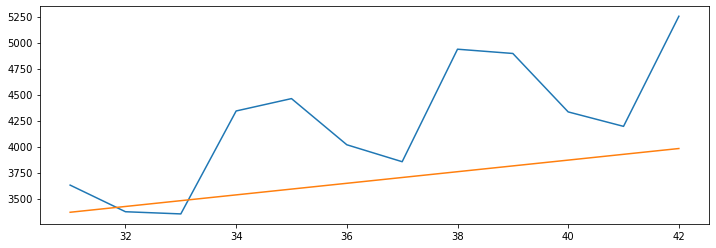

In [19]:
#linear Model
plt.figure(figsize=(12,4))
linear_model=smf.ols("Sales~t",data=Train).fit()
pred_linear=pd.Series(linear_model.predict(Test['t']))
rmse_linear=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2))
print("RMSE_Linear_Model:",rmse_linear)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_linear)
plt.show()

RMSE_Exponential_Model: 552.2821039079295


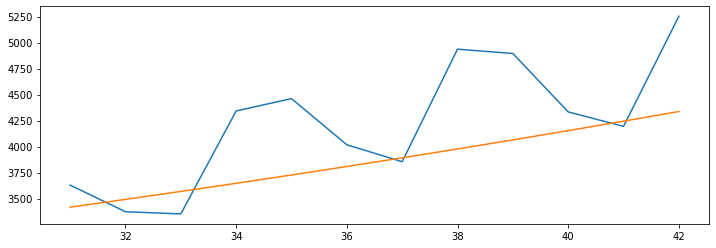

In [20]:
#Exponential
plt.figure(figsize=(12,4))
Exp= smf.ols("log_Sales~t",data=Train).fit()
pred_Exp= pd.Series(Exp.predict(Test["t"]))
pred_Exp=np.exp(pred_Exp)
rmse_Exp= np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_Exp))**2))
print("RMSE_Exponential_Model:",rmse_Exp)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_Exp)
plt.show()

RMSE_Qudratic_Model: 714.0144483281297


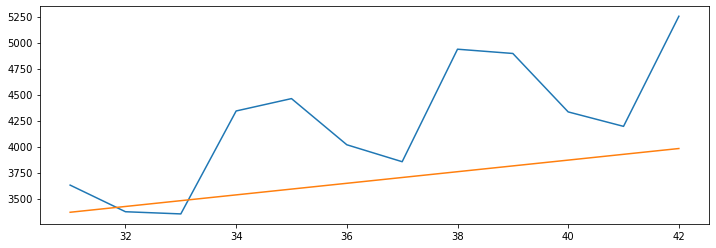

In [21]:
#Quadratic
plt.figure(figsize=(12,4))
Quad=smf.ols("Sales~t+(t**2)",data=Train).fit()
pred_Quad= pd.Series(Quad.predict(Test["t"]))
rmse_Quad=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_Quad))**2))
print("RMSE_Qudratic_Model:",rmse_Quad)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_Quad)
plt.show()

RMSE_Additive Seasonality Model: 1778.0065467941363


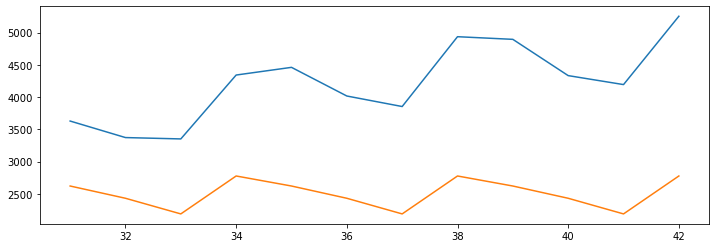

In [22]:
# Additive seasonality
plt.figure(figsize=(12,4))
add_sea= smf.ols("Sales~Q1+Q2+Q3+Q4",data=Train).fit()
pred_add_sea= pd.Series(add_sea.predict(Test[["Q1","Q2","Q3","Q4"]]))
rmse_add_se=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
print("RMSE_Additive Seasonality Model:",rmse_add_se)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_add_sea)
plt.show()

RMSE_Multiplicative Seasonality: 1828.9238912138073


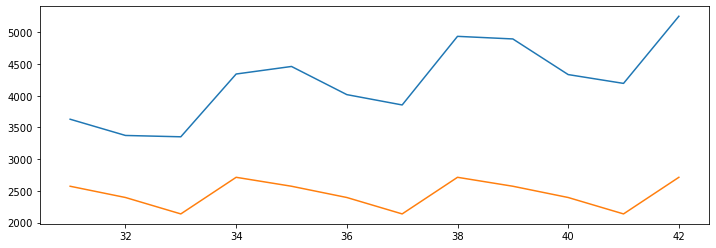

In [23]:
#Multiplicative seasonality
plt.figure(figsize=(12,4))
Mul_sea= smf.ols("log_Sales~Q1+Q2+Q3+Q4",data=Train).fit()
pred_Mult_sea= pd.Series(Mul_sea.predict(Test[["Q1","Q2","Q3","Q4"]]))
pred_Mult_sea=np.exp(pred_Mult_sea)
rmse_Mult_se=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Mult_sea))**2))
print("RMSE_Multiplicative Seasonality:",rmse_Mult_se)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_Mult_sea)
plt.show()

RMSE_Additive_seasonality_Quadratic: 170.42727210326223


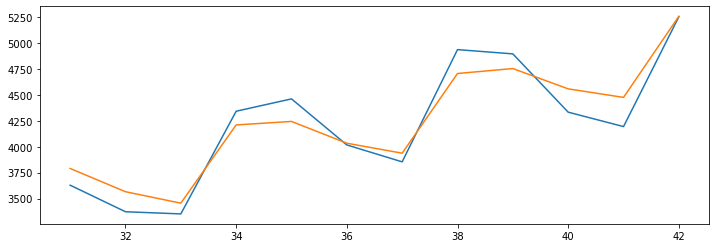

In [24]:
#Additive seasonality Quadratic
plt.figure(figsize=(12,4))
add_sea_quad=smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4",data=data).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(Test[["t","t_square","Q1","Q2","Q3","Q4"]]))
rmse_add_sea_quad= np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_sea_quad))**2))
print("RMSE_Additive_seasonality_Quadratic:",rmse_add_sea_quad)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_add_sea_quad)
plt.show()

RMSE_Additive_seasonality_Linear: 270.4736996942323


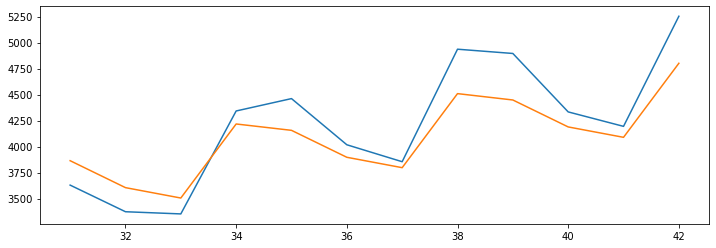

In [25]:
#Additive seasonality linear
plt.figure(figsize=(12,4))
add_sea_lin=smf.ols("Sales~t+Q1+Q2+Q3+Q4",data=data).fit()
pred_add_sea_lin=pd.Series(add_sea_lin.predict(Test[["t","Q1","Q2","Q3","Q4"]]))
rmse_add_sea_lin= np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_sea_lin))**2))
print("RMSE_Additive_seasonality_Linear:",rmse_add_sea_lin)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_add_sea_lin)
plt.show()

RMSE_Multiplicative_seasonality_Quadratic 168.28154466109726


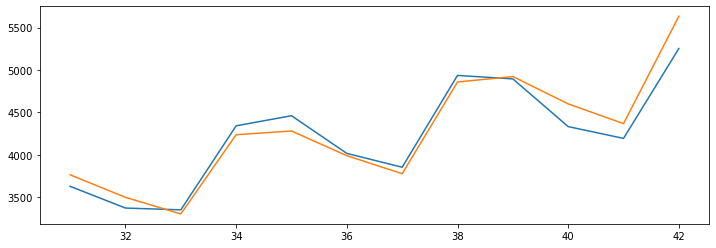

In [26]:
# Multiplicative Seasonality Quadratic
plt.figure(figsize=(12,4))
Mul_sea_quad=smf.ols("log_Sales~t+t_square+Q1+Q2+Q3+Q4",data=data).fit()
pred_Mul_sea_quad=pd.Series(Mul_sea_quad.predict(Test[["t","t_square","Q1","Q2","Q3","Q4"]]))
pred_Mul_sea_quad=np.exp(pred_Mul_sea_quad)
rmse_Mul_sea_quad= np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_Mul_sea_quad))**2))
print("RMSE_Multiplicative_seasonality_Quadratic",rmse_Mul_sea_quad)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_Mul_sea_quad)
plt.show()

RMSE_Multiplicative_seasonality_linear 172.15056883930023


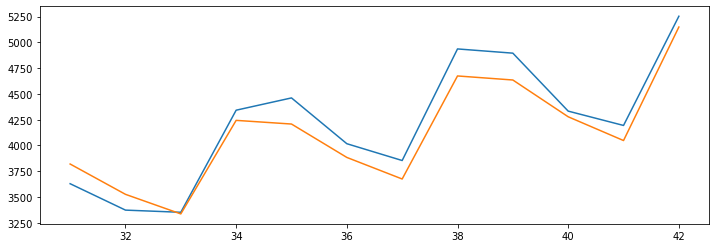

In [27]:
#linear Multiplicative seasonality
plt.figure(figsize=(12,4))
Mul_sea_lin=smf.ols("log_Sales~t+Q1+Q2+Q3+Q4",data=data).fit()
pred_Mul_sea_lin=pd.Series(Mul_sea_lin.predict(Test[["t","Q1","Q2","Q3","Q4"]]))
pred_Mul_sea_lin=np.exp(pred_Mul_sea_lin)
rmse_Mul_sea_lin= np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_Mul_sea_lin))**2))
print("RMSE_Multiplicative_seasonality_linear",rmse_Mul_sea_lin)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_Mul_sea_lin)
plt.show()

RMSE_Moving_Average 288.8483959334608


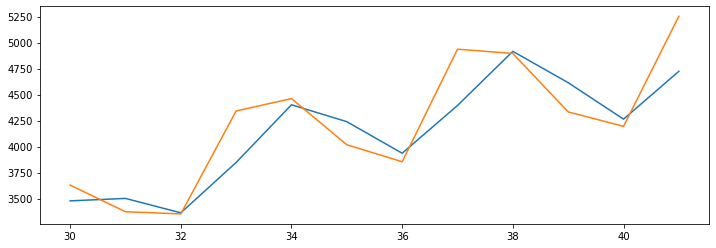

In [28]:
#Moving Average model

plt.figure(figsize=(12,4))
A=Test["Sales"].rolling(2).mean()
A[30]=(Train.Sales[29]+Train.Sales[28])/2
RMSE=np.sqrt(mean_squared_error(Test["Sales"],A))
print("RMSE_Moving_Average",RMSE)
A.plot()
Test.Sales.plot(label="org")
plt.show()

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


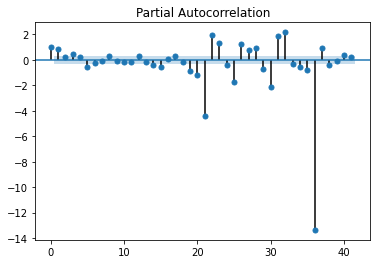

In [29]:
plot_pacf(data.Sales,lags=41)
plt.show()

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


RMSE_Simple_Exponential_Method 667.8890252130215


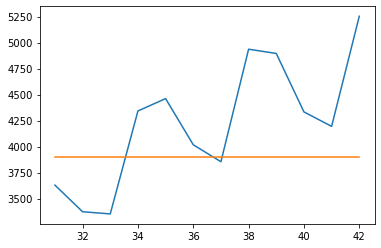

In [30]:
#Simple Exopnential Method
ses_model=SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=1)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
RMSE_SM=np.sqrt(mean_squared_error(Test["Sales"],pred_ses))
print("RMSE_Simple_Exponential_Method",RMSE_SM)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_ses)
plt.show()

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


RMSE_Holt_Method 460.6349209036757


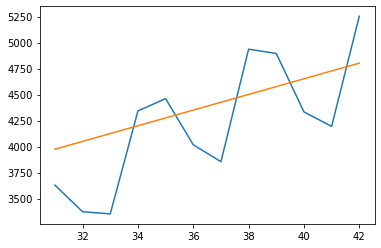

In [31]:
#Holt method

hw_model=Holt(Train["Sales"]).fit(smoothing_level=1,smoothing_slope=0.01)
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
RMSE_HM=np.sqrt(mean_squared_error(Test["Sales"],pred_hw))
print("RMSE_Holt_Method",RMSE_HM)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_hw)
plt.show()

RMSE_Holt_Winter_Additive_Method 859.370361464732


C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


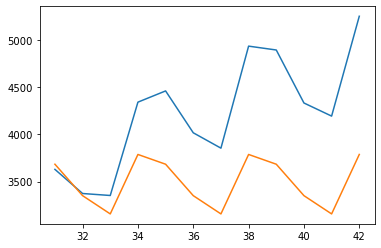

In [32]:
#Holts Winter exponential smoothing with additive seasonality and additive trend
hwe_model_add=ExponentialSmoothing(Train["Sales"],seasonal="add",seasonal_periods=4).fit()
pred_hwe_ad=hwe_model_add.predict(start=Test.index[0],end=Test.index[-1])
RMSE_pred_hwe=np.sqrt(mean_squared_error(Test["Sales"],pred_hwe_ad))
print("RMSE_Holt_Winter_Additive_Method",RMSE_pred_hwe)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_hwe_ad)
plt.show()

RMSE_Holt_Winter_Multiplicative_Method 153.28095241886047


C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


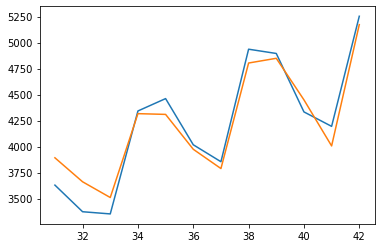

In [33]:
#Holts Winter exponential smoothing with multiplicative seasonality and multiplicative trend
hwe_model_mul= ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul = hwe_model_mul.predict(start = Test.index[0],end = Test.index[-1])
RMSE_hwe_mul=np.sqrt(mean_squared_error(Test["Sales"],pred_hwe_mul))
print("RMSE_Holt_Winter_Multiplicative_Method",RMSE_hwe_mul)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],pred_hwe_mul)
plt.show()

In [34]:
test=Test.Sales.astype('float32')
train=Train.Sales.astype('float32')
m=float('inf')

In [35]:
x=4
y=4
z=4
warnings.filterwarnings("ignore")
for i in range(0,x,1):
    for j in range(0,y,1):
        for k in range(0,z,1):
            try:
                model=ARIMA(train,order=(i,j,k))
                model=model.fit()
                RM=model.predict(start = test.index[0],end = test.index[-1])
                RMSE=np.sqrt(mean_squared_error(test,RM))
                order=(i,j,k)
                print(order,RMSE)
                if RMSE<m :
                    m=RMSE
                    best_order=(i,j,k)
            except:
                continue


           

(0, 0, 0) 1813.013807295088
(0, 0, 1) 1776.6349918716967
(0, 0, 2) 1723.745298636705
(0, 0, 3) 1747.7208592580996
(0, 1, 0) 4186.468383970849
(0, 1, 1) 4235.539286494113
(0, 1, 2) 4244.09820097913
(0, 1, 3) 4242.389128407498
(0, 2, 0) 4248.598930787176
(0, 2, 1) 4312.331449103075
(0, 2, 2) 4317.021180235393
(0, 2, 3) 4314.309267262873
(1, 0, 0) 1367.569784538801
(1, 0, 1) 1078.7487071652838
(1, 0, 2) 21984.48904499305
(1, 0, 3) 918.6722316473839
(1, 1, 0) 4201.552612129878
(1, 1, 1) 4234.015780661319
(1, 1, 2) 4231.9554238149785
(1, 2, 0) 4274.028825664397
(1, 2, 1) 4315.287298529431
(2, 0, 0) 1301.2623210792963
(2, 0, 1) 1078.8614995283635
(2, 0, 2) 1034.100273870879
(2, 0, 3) 921.4525126245117
(2, 1, 0) 4231.774544123629
(2, 1, 1) 4228.786730708493
(2, 1, 2) 4208.236721891584
(2, 2, 0) 4303.733911682419
(2, 2, 1) 4334.381798257049
(3, 0, 0) 1027.9894480903781
(3, 1, 0) 4221.304077591756
(3, 1, 1) 4204.90318417494
(3, 2, 0) 4291.273464428378
(3, 2, 1) 4282.788203269176


In [36]:
m,best_order

(918.6722316473839, (1, 0, 3))

RMSE_Arima_Model_ 918.7128996521012


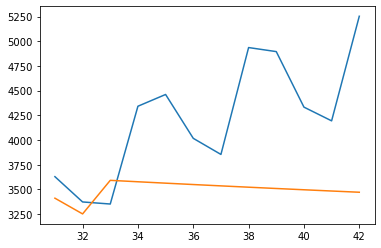

In [37]:
model=ARIMA(Train['Sales'],order=(1,0,3))
model=model.fit()
RM=model.predict(start = Test.index[0],end = Test.index[-1])
RMSE=np.sqrt(mean_squared_error(Test["Sales"],RM))
print("RMSE_Arima_Model_",RMSE)
plt.plot(Test["t"],Test["Sales"])
plt.plot(Test["t"],RM)
plt.show()

# Final model based on Best Model
training on full dataset

RMSE_Holt_Winter_Multiplicative_Method 162.7874752088714


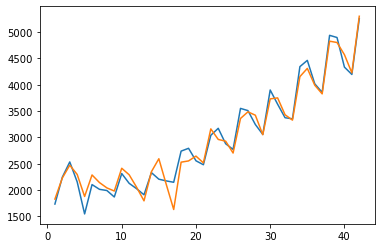

In [38]:
#Holts Winter exponential smoothing with multiplicative seasonality and multiplicative trend
hwe_model_mul= ExponentialSmoothing(data["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul = hwe_model_mul.predict(start = data.index[0],end = data.index[-1])
RMSE_hwe_mul=np.sqrt(mean_squared_error(data["Sales"],pred_hwe_mul))
print("RMSE_Holt_Winter_Multiplicative_Method",RMSE_hwe_mul)
plt.plot(data["t"],data["Sales"])
plt.plot(data["t"],pred_hwe_mul)
plt.show()